## Insurance claim detection
Predicting car insurance claims is a crucial task for insurance companies seeking to optimize risk management, pricing strategies, and resource allocation. By accurately forecasting the likelihood of future claims, insurers can make informed decisions regarding premiums, underwriting policies, and claims processing, ultimately improving operational efficiency and profitability while ensuring fair and competitive pricing for policyholders.

Data link - [link](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification)

The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

 The aim of this assignment is to use MLP and experiemnt with various architectures(hyperparameters) and predict churn. Through this experimentation we aim to analyse various generic patterns in either performance or training time etc.

In [ ]:
## import required libraries
import pandas as pd

### Data Loading and processing

In [ ]:
file_path = r'/content/insurance_claim_data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.shape

(58592, 44)

In [ ]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
target_col = 'is_claim'

In [ ]:
data[target_col].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In our entire data, the proportion claimed (positives) is way less than (negatives), hence claim class looks like an imbalanced class.

A random train test split might not be correct because there is a chance that, all positive samples might go into training and we might not have a chance to evaluate prediction of insurance claimed customers. Hence, proceed with stratified train test split whcih allows for similar distribution of target in train and test sets.

**Perfomed Stratified Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(data, random_state=1,stratify = data[target_col], test_size = 0.25)

In [ ]:
train_data.shape,test_data.shape

((43944, 44), (14648, 44))

In [ ]:
train_data[target_col].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [ ]:
test_data[target_col].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

We can see that both train and test sets have same distribution of target column.

Since there are categorical columns, convert them into numeric values either by one-hot encoding or label encoding or some other kindof transformation.

Since policy_id is just an identifier and is random and doesnt effect their insurance claim decision, dropping that column.

In [ ]:
train_data.drop('policy_id',axis=1,inplace=True)
test_data.drop('policy_id',axis=1,inplace=True)

In [ ]:
data_cols = train_data.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in data_cols:
  if train_data[col].dtype == object:
    if col != target_col:
      print(col, train_data[col].nunique() )

area_cluster 22
segment 6
model 11
fuel_type 3
max_torque 9
max_power 9
engine_type 11
is_esc 2
is_adjustable_steering 2
is_tpms 2
is_parking_sensors 2
is_parking_camera 2
rear_brakes_type 2
transmission_type 2
steering_type 3
is_front_fog_lights 2
is_rear_window_wiper 2
is_rear_window_washer 2
is_rear_window_defogger 2
is_brake_assist 2
is_power_door_locks 2
is_central_locking 2
is_power_steering 2
is_driver_seat_height_adjustable 2
is_day_night_rear_view_mirror 2
is_ecw 2
is_speed_alert 2


Since most of the columns have Yes/No or small number of nunique values, one hot encoding can be performed on the above categorical columns.

In [ ]:
for col in data_cols:
  if train_data[col].dtype == object:
    if col != target_col:
      # encoding using onehot encoder
      ohe = OneHotEncoder(drop='first')
      ohe.fit(train_data[[col]])
      train_data[ohe.get_feature_names_out().tolist()] = ohe.transform(train_data[[col]]).toarray()
      test_data[ohe.get_feature_names_out().tolist()] = ohe.transform(test_data[[col]]).toarray()
      # Done with feature encoding, now dropping the actual categorical columns.
      train_data.drop(col,axis=1,inplace=True)
      test_data.drop(col,axis=1,inplace=True)


In [ ]:
train_data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
count,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,...,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000,43944.000000
mean,0.609665,0.069441,0.469581,18885.934803,1.768728,3.141020,1163.206763,3.628436,5.246473,4.853705,...,0.290392,0.351811,0.550177,0.724536,0.724536,0.979451,0.586451,0.380689,0.724536,0.993583
std,0.414302,0.056834,0.122864,17732.414625,1.139663,1.834387,266.505849,0.483228,0.430962,0.228201,...,0.453949,0.477541,0.497482,0.446753,0.446753,0.141870,0.492475,0.485562,0.446753,0.079851
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207507,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.572047,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.038528,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Few columns have values which are in higher range like 1000's, 10,000's, and it would be difficult for the model to converge, hence scale the columns.

In [ ]:
temp = train_data.describe()
temp = pd.DataFrame(temp.loc['mean']>10)
scale_cols = temp[temp['mean']==True].index
print(scale_cols)

Index(['population_density', 'displacement', 'length', 'width', 'height',
       'gross_weight'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

std_slr = StandardScaler()
std_slr.fit(train_data[scale_cols])

train_scaled = train_data.copy()
test_scaled = test_data.copy()

train_scaled[scale_cols] = std_slr.transform(train_data[scale_cols])
test_scaled[scale_cols] = std_slr.transform(test_data[scale_cols])

Done with data processing and train test set creation.

Since the data is very imbalanced, when ran a sample experiment, model was highly biased towards negative class. Hence performing downsampling on the majority class to overcome this problem.

In [ ]:
minority_subset = train_scaled[train_scaled[target_col] == 1]
majority_subset =train_scaled[train_scaled[target_col] == 0].sample(n=minority_subset.shape[0], random_state=1)
train_scaled_balanced = pd.concat([majority_subset, minority_subset],axis=0)

In [ ]:
y_train =  train_scaled_balanced[[target_col]]
X_train = train_scaled_balanced.drop(target_col, axis=1)

In [ ]:
y_test =  test_scaled[[target_col]]
X_test = test_scaled.drop(target_col, axis=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5622, 100), (5622, 1), (14648, 100), (14648, 1))

### Model Building

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
import time
import numpy as np

outputs = []
hidden_layers = [[32], [64],[64,32],[128,64,32]]
activation_funcs = ['tanh','relu']
for hidden_layer in hidden_layers:
  for activation_func in activation_funcs:
    time_start = time.time()
    clf = MLPClassifier(random_state=1, hidden_layer_sizes=hidden_layer,activation= activation_func,max_iter = 500)
    clf.fit(X_train,y_train)
    print(clf.max_iter)

    print('Done model training with hidden layer', hidden_layer, 'activation', activation_func,'iterations',clf.n_iter_)
    print('time taken', time.time()- time_start)

    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    mat_train = metrics.confusion_matrix(y_train, y_train_pred)
    mat_test = metrics.confusion_matrix(y_test, y_test_pred)

    train_acc = metrics.accuracy_score(y_train,y_train_pred)
    test_acc = metrics.accuracy_score(y_test,y_test_pred)

    class_report = metrics.classification_report(y_test, y_test_pred)

    outputs.append([hidden_layer, activation_func, class_report, mat_test,mat_train,train_acc,test_acc,clf.n_iter_])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [32] activation tanh iterations 89
time taken 3.2975168228149414


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [32] activation relu iterations 234
time taken 7.805130243301392


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [64] activation tanh iterations 190
time taken 10.984426736831665


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [64] activation relu iterations 133
time taken 5.038154125213623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [64, 32] activation tanh iterations 56
time taken 4.188575744628906


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [64, 32] activation relu iterations 196
time taken 10.484808683395386


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [128, 64, 32] activation tanh iterations 284
time taken 50.14936661720276


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


500
Done model training with hidden layer [128, 64, 32] activation relu iterations 362
time taken 37.012516021728516


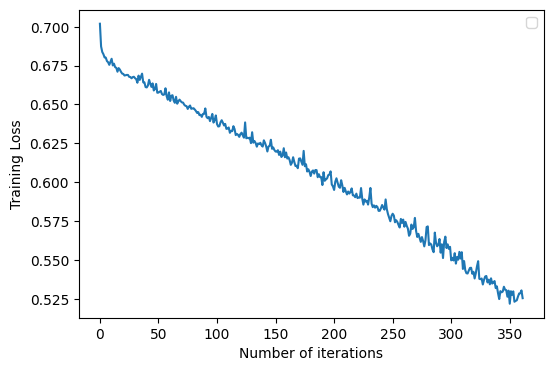

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf.loss_curve_)

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Training Loss')
plt.legend()
plt.show()

In [ ]:
for i in range(len(outputs)):
  print('train',outputs[i][5])
  print('test',outputs[i][6])

train 0.5926716471006759
test 0.5823320589841616
train 0.6177516897901103
test 0.5367285636264336
train 0.6036997509782995
test 0.4557618787547788
train 0.6118818925649235
test 0.56301201529219
train 0.5932052650302384
test 0.4985663571818678
train 0.6382070437566703
test 0.5142681594756964
train 0.7082888651725364
test 0.5542736209721464
train 0.7344361437210957
test 0.5519524849808848


In [ ]:
for i in range(len(outputs)):
  print(outputs[i][2])

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     13711
           1       0.09      0.58      0.15       937

    accuracy                           0.58     14648
   macro avg       0.52      0.58      0.44     14648
weighted avg       0.90      0.58      0.69     14648

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     13711
           1       0.08      0.63      0.15       937

    accuracy                           0.54     14648
   macro avg       0.52      0.58      0.42     14648
weighted avg       0.90      0.54      0.65     14648

              precision    recall  f1-score   support

           0       0.96      0.44      0.60     13711
           1       0.08      0.72      0.14       937

    accuracy                           0.46     14648
   macro avg       0.52      0.58      0.37     14648
weighted avg       0.90      0.46      0.57     14648

              preci

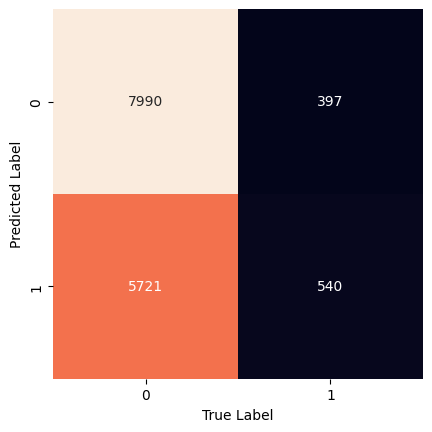

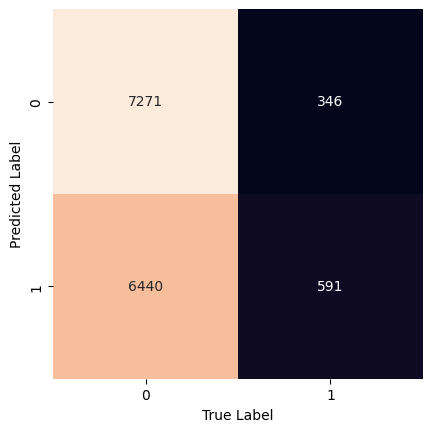

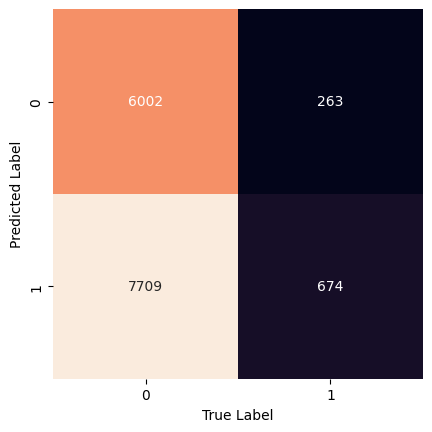

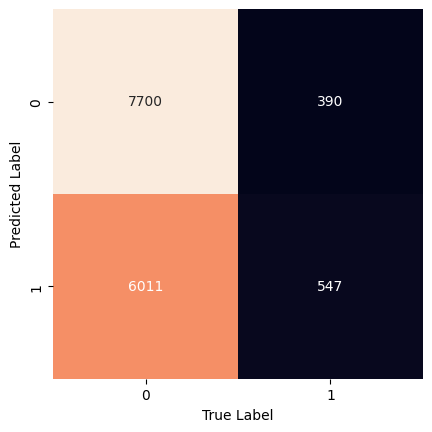

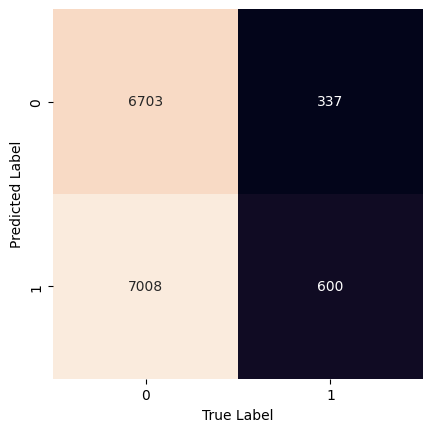

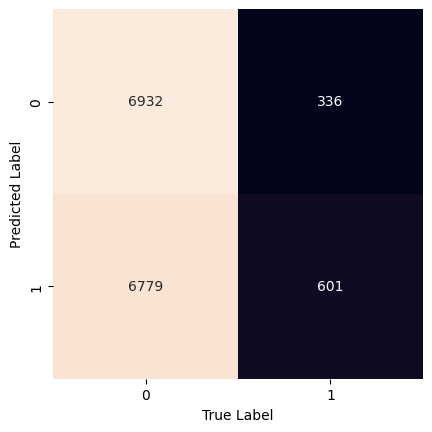

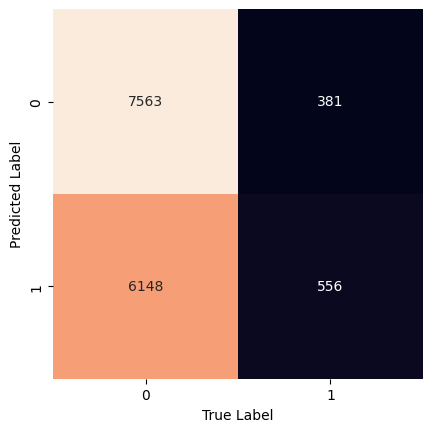

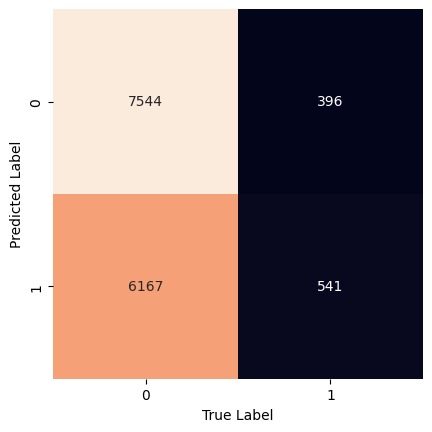

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(len(outputs)):
  mat = outputs[i][3]
  plt.figure(i)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
